# NFT MCD

In [28]:
def deldub(x,y):
    data = {
    'column1': x,
    'column2': y
    }
    df = pd.DataFrame(data)
    df['group'] = (df['column1'] != df['column1'].shift()).cumsum()
    result = df.groupby(['column1', 'group'], as_index=False, sort=False)['column2'].median()
    result = result.drop(columns='group')
    
    return result

#    test
x1 = ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'D', 'A', 'A']
y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 7]
deldub(x1,y1)
print(deldub(x1,y1))

  column1  column2
0       A      1.5
1       B      4.0
2       C      6.5
3       D      8.5
4       A      5.5


['Test-32.csv']
   time  COM4.Field_sweep  GPIB0::4::INSTR.x  GPIB0::4::INSTR.y  \
0  1.26           -0.4994           0.000003       3.725320e-09   
1  1.39           -0.4994           0.000003       2.514580e-08   
2  1.52           -0.4994           0.000003       6.519300e-08   
3  1.67           -0.4994           0.000003       8.405230e-08   
4  1.82           -0.4994           0.000003       8.544930e-08   

   GPIB0::4::INSTR.r  GPIB0::4::INSTR.Θ  GPIB0::5::INSTR.x  GPIB0::5::INSTR.y  \
0           0.000003              0.090           0.027924           0.000069   
1           0.000003              0.624           0.027926           0.000065   
2           0.000003              1.362           0.027933           0.000065   
3           0.000003              1.512           0.027933           0.000061   
4           0.000003              1.446           0.027926           0.000053   

   GPIB0::5::INSTR.r  GPIB0::5::INSTR.Θ  COM4.Temp  COM4.Field  
0           0.027924         

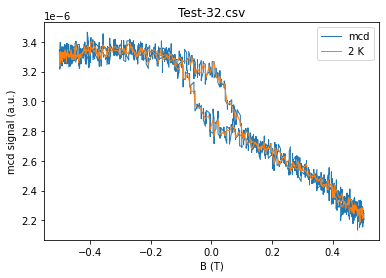

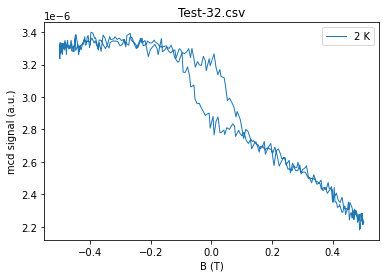

In [32]:
from matplotlib import pylab as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, realpath
import re
import pandas as pd

mypath = 'C:/Users/g.sergey/python/mcd_data' #'D:/Projects/git/nft/data.mcd' 
os.chdir(mypath)

files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.split(".")[-1] != "png" and f.split(".")[-1] != "ipynb"]
print(files)

# Load the data into a pandas DataFrame
df = pd.read_csv('Test-32.csv')
print(df.head(5))  



for file in files:
    frame = pd.read_csv(file, header=0, sep=',')
    #frame.plot(x='COM4.Field', y='GPIB0::4::INSTR.x', kind='line')
    x = frame['COM4.Field']
    y = frame['GPIB0::4::INSTR.x']
    print(deldub(x,y))
    plt.plot(x, y, label='mcd', linewidth=1)
    plt.plot(deldub(x,y)['column1'], deldub(x,y)['column2'], label='2 K', linewidth=1)
    plt.title(file)
    plt.legend()
    plt.ylabel('mcd signal (a.u.)') 
    plt.xlabel('B (T)')
    plt.show()
    
    plt.plot(deldub(x,y)['column1'], deldub(x,y)['column2'], label='2 K', linewidth=1)
    plt.title(file)
    plt.legend()
    plt.ylabel('mcd signal (a.u.)') 
    plt.xlabel('B (T)')
    plt.show()